In [ ]:
rm( list=ls( all = TRUE ) )


In [ ]:

par(mfrow=c(3,1))

phi.1 = .6;
phi.2 = .2;
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))

plot(data.ts, main= paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2) )

acf(data.ts, main="Autocorrelation Function")

acf(data.ts, type="partial", main="Partial Autocorrelation Function")


In [ ]:
phi.1 = .9;
phi.2 = -.6;
phi.3 = .3;

data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2, phi.3)))

plot(data.ts, main= paste("Autoregressive Process with phi1=", phi.1," phi2=",phi.2," phi3=",phi.3) )

acf(data.ts, main="Autocorrelation Function")

acf(data.ts, type="partial", main="Partial Autocorrelation Function")


In [1]:
library(quantspec)
data(wheatprices)


Loading required package: stats4



wheatprices,ts_diff1
0.0007050765,NA
0.0043482452,0.003643169
0.0061906956,0.001842450
-0.0032040683,-0.009394764
-0.0070020526,-0.003797984
-0.0052815797,0.001720473


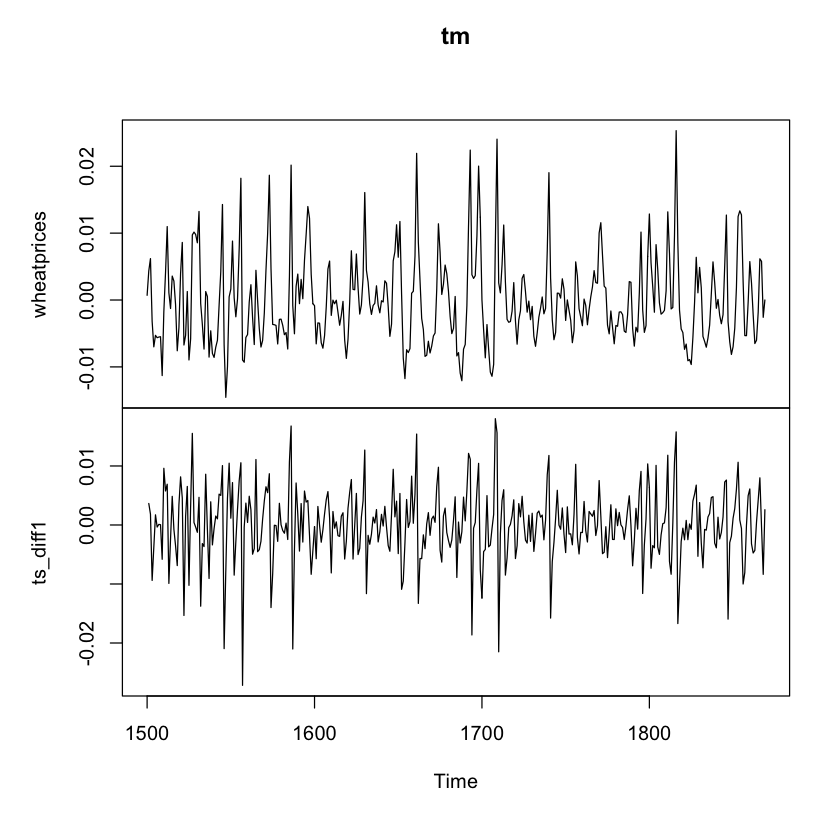

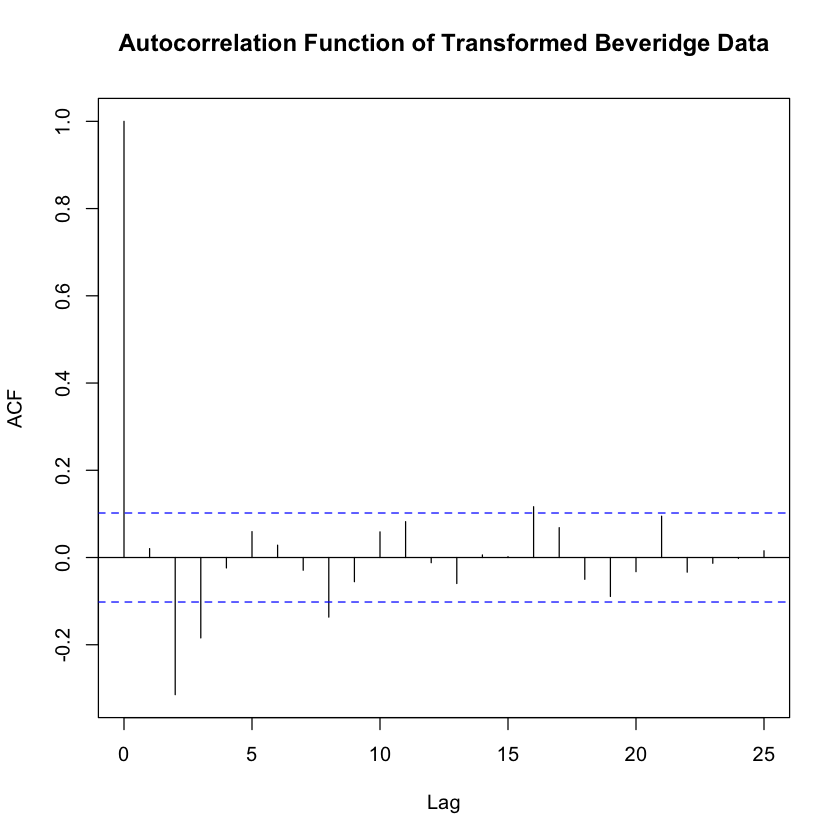

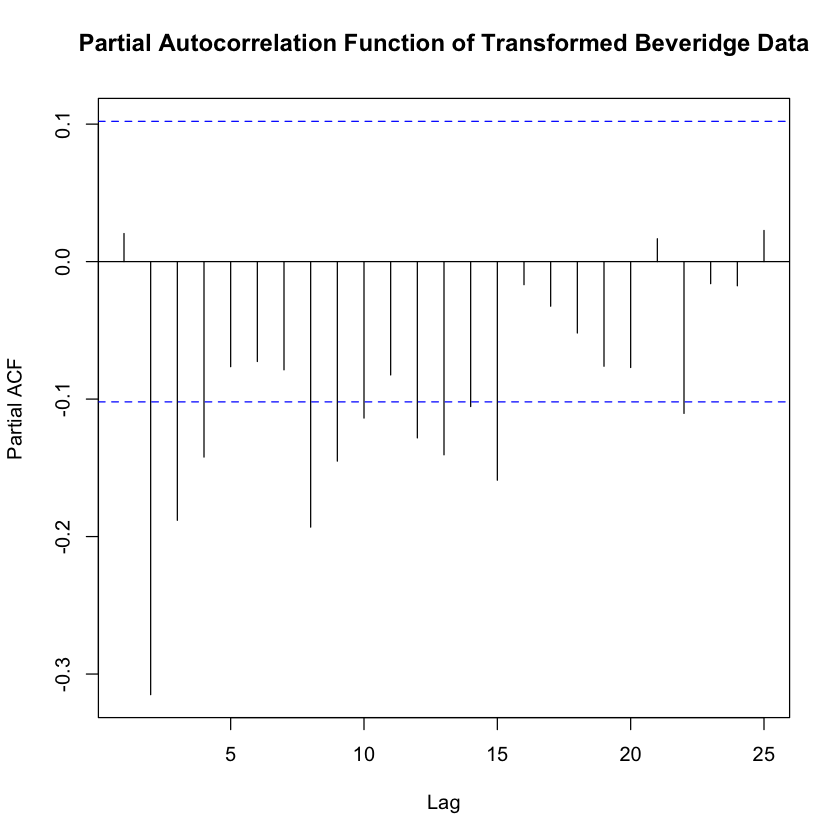

In [21]:
ts_diff1 <- diff(wheatprices, lag = 1)  
tm <- cbind(wheatprices, ts_diff1) 
head(tm) 
plot.ts(tm) 

acf(na.omit(ts_diff1), main="Autocorrelation Function of Transformed Beveridge Data")
acf(na.omit(ts_diff1), type="partial", main="Partial Autocorrelation Function of Transformed Beveridge Data")

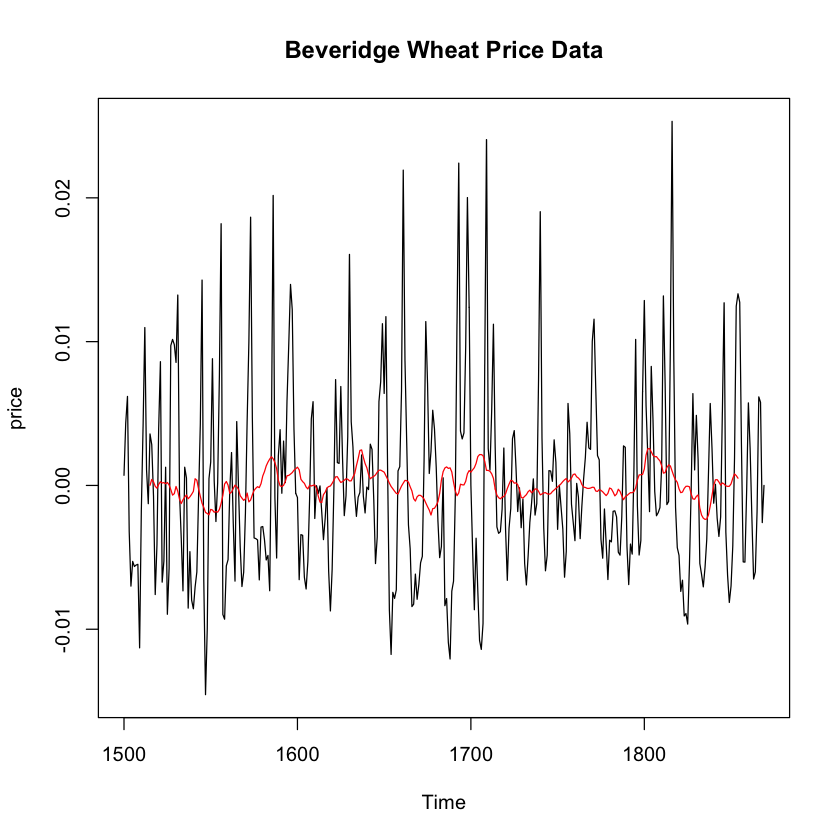

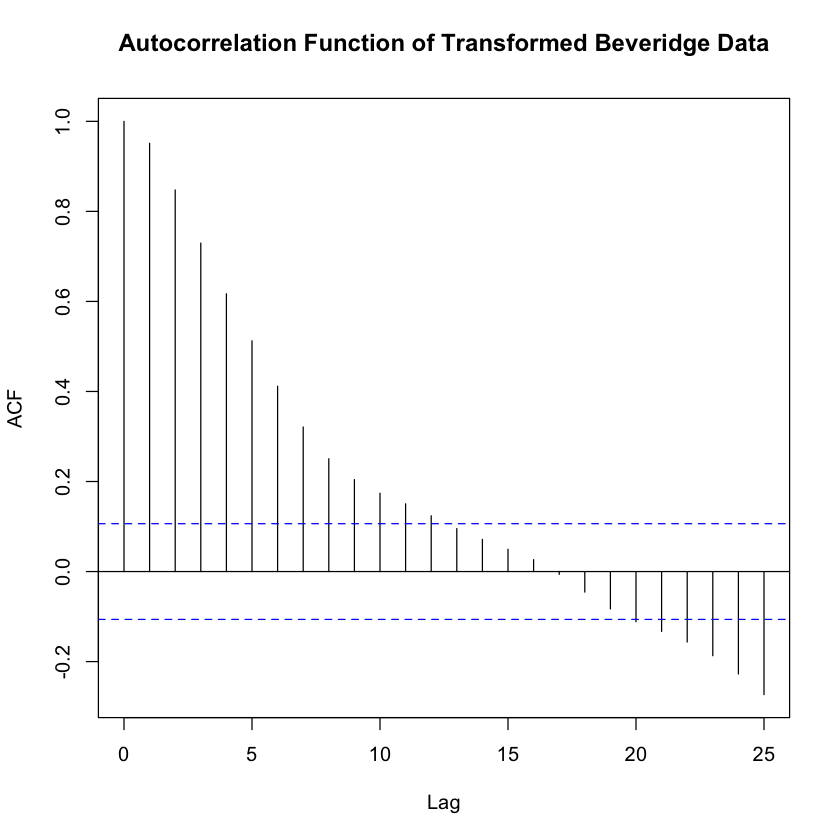

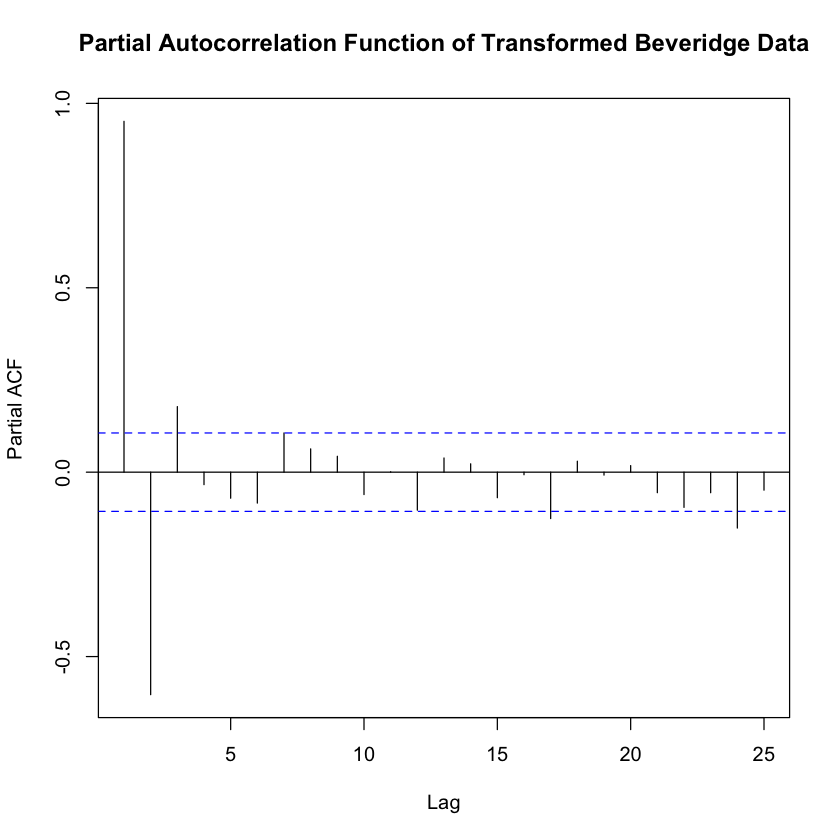

In [7]:
plot( wheatprices, ylab="price", main="Beveridge Wheat Price Data")
beveridge.MA = filter(wheatprices, rep(1/31, 31), sides = 2)
lines(beveridge.MA, col="red")

acf(na.omit(beveridge.MA), main="Autocorrelation Function of Transformed Beveridge Data")
acf(na.omit(beveridge.MA), type="partial", main="Partial Autocorrelation Function of Transformed Beveridge Data")

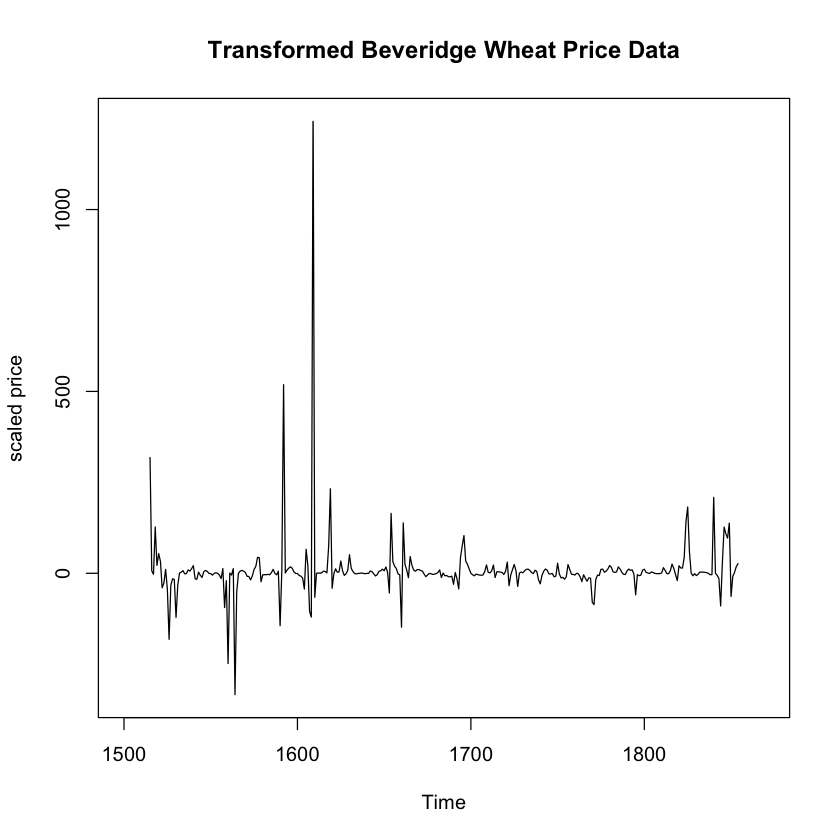

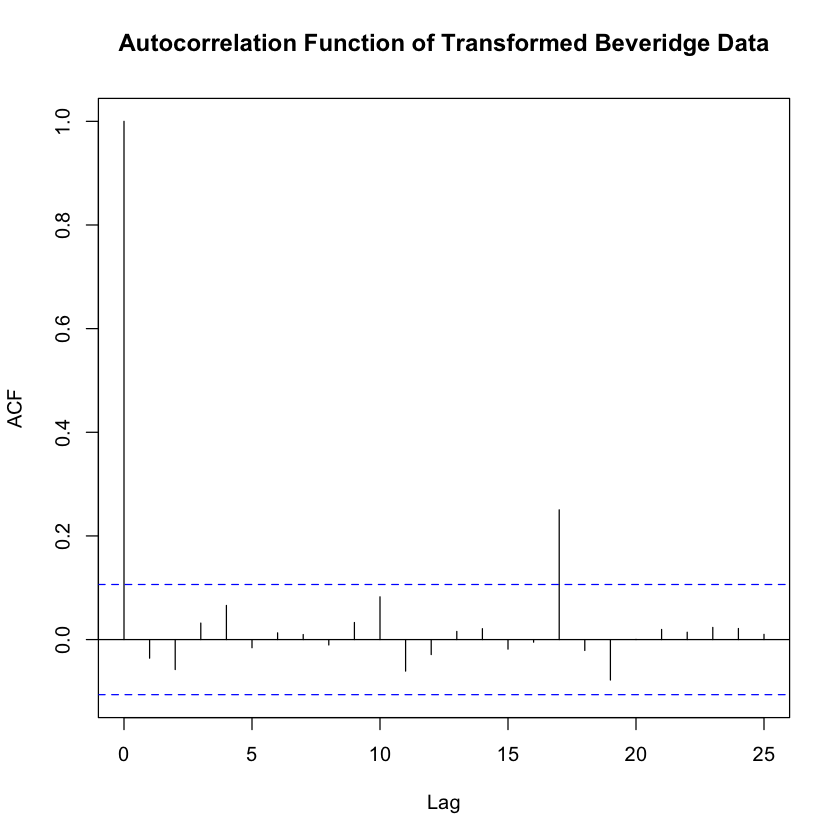

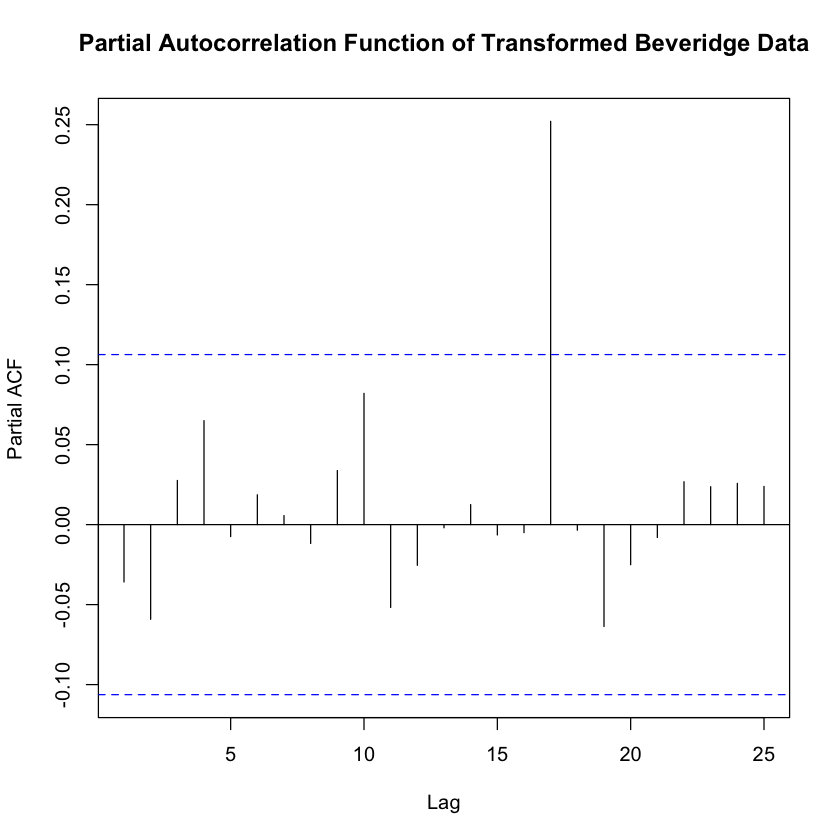

In [4]:
Y = wheatprices/beveridge.MA
plot( Y, ylab="scaled price", main="Transformed Beveridge Wheat Price Data")
acf(na.omit(Y), main="Autocorrelation Function of Transformed Beveridge Data")
acf(na.omit(Y), type="partial", main="Partial Autocorrelation Function of Transformed Beveridge Data")

In [25]:
ar(na.omit(ts_diff1), order.max = 100)


Call:
ar(x = na.omit(ts_diff1), order.max = 100)

Coefficients:
      1        2        3        4        5        6        7        8  
-0.2106  -0.5230  -0.4321  -0.4165  -0.3773  -0.3905  -0.3667  -0.4340  
      9       10       11       12       13       14       15  
-0.3698  -0.3244  -0.2687  -0.2652  -0.2385  -0.1362  -0.1590  

Order selected 15  sigma^2 estimated as  2.843e-05

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.8432654,0.8780896,0.1424440
Triceps,0.8432654,1.0000000,0.9238425,0.4577772
Thigh,0.8780896,0.9238425,1.0000000,0.0846675
Midarm,0.1424440,0.4577772,0.0846675,1.0000000


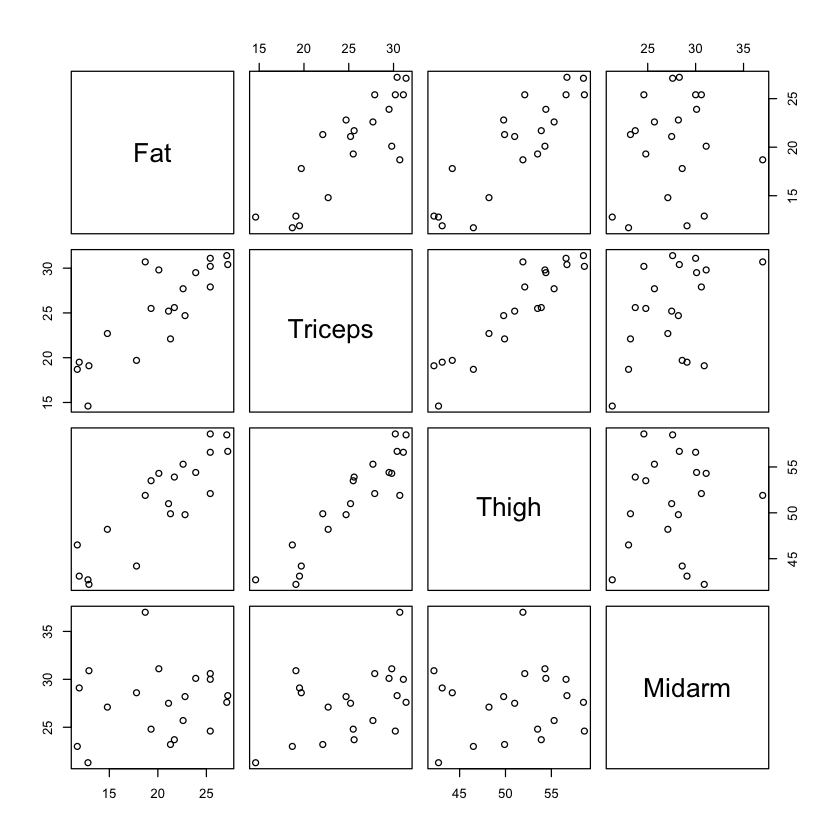

In [1]:
library(isdals)
data(bodyfat)

attach(bodyfat)

pairs( cbind( Fat, Triceps, Thigh, Midarm))

cor( cbind( Fat, Triceps, Thigh, Midarm))

In [2]:
Fat.hat = predict(lm(Fat~Thigh))
Triceps.hat = predict( lm(Triceps~Thigh) )
cor( (Fat- Fat.hat), (Triceps- Triceps.hat) )

[1] 0.1749822

In [6]:
library(ppcor)
Fat.hat = predict(lm(Fat~Thigh+Midarm))
Triceps.hat = predict( lm(Triceps~Thigh+Midarm) )
cor( (Fat- Fat.hat), (Triceps- Triceps.hat) ) #returns 0.33815
pcor( cbind( Fat, Triceps, Thigh, Midarm) )

[1] 0.33815

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.3381500,-0.2665991,-0.3240520
Triceps,0.3381500,1.0000000,0.9963725,0.9955918
Thigh,-0.2665991,0.9963725,1.0000000,-0.9926612
Midarm,-0.3240520,0.9955918,-0.9926612,1.0000000
,Fat,Triceps,Thigh,Midarm
Fat,0.0000000,1.699111e-01,2.848944e-01,1.895628e-01
Triceps,0.1699111,0.000000e+00,1.490492e-18,7.071386e-18
Thigh,0.2848944,1.490492e-18,0.000000e+00,4.134178e-16
Midarm,0.1895628,7.071386e-18,4.134178e-16,0.000000e+00
,Fat,Triceps,Thigh,Midarm
